In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import joypy
from pandas.plotting import table 
from scipy.stats import linregress
from scipy.stats import describe
from sklearn import datasets
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, accuracy_score
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})




In [8]:
file = "/Volumes/Music/Data Analysis/My Projects/NASA - Nearest Earth Objects/NASA-NearEarthObjects/neo.csv"

In [9]:
df = pd.read_csv(file)

In [10]:
df

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
0,2162635,162635 (2000 SS164),1.198271,2.679415,13569.249224,5.483974e+07,Earth,False,16.73,False
1,2277475,277475 (2005 WK4),0.265800,0.594347,73588.726663,6.143813e+07,Earth,False,20.00,True
2,2512244,512244 (2015 YE18),0.722030,1.614507,114258.692129,4.979872e+07,Earth,False,17.83,False
3,3596030,(2012 BV13),0.096506,0.215794,24764.303138,2.543497e+07,Earth,False,22.20,False
4,3667127,(2014 GE35),0.255009,0.570217,42737.733765,4.627557e+07,Earth,False,20.09,True
...,...,...,...,...,...,...,...,...,...,...
90831,3763337,(2016 VX1),0.026580,0.059435,52078.886692,1.230039e+07,Earth,False,25.00,False
90832,3837603,(2019 AD3),0.016771,0.037501,46114.605073,5.432121e+07,Earth,False,26.00,False
90833,54017201,(2020 JP3),0.031956,0.071456,7566.807732,2.840077e+07,Earth,False,24.60,False
90834,54115824,(2021 CN5),0.007321,0.016370,69199.154484,6.869206e+07,Earth,False,27.80,False


In [11]:
# Understand the data types in each column
df.dtypes


id                      int64
name                   object
est_diameter_min      float64
est_diameter_max      float64
relative_velocity     float64
miss_distance         float64
orbiting_body          object
sentry_object            bool
absolute_magnitude    float64
hazardous                bool
dtype: object

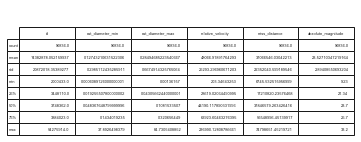

In [14]:
# Describe the data
desc_df = df.describe()

ax = plt.subplot(911, frame_on=False) # no visible frame
ax.xaxis.set_visible(False)  # hide the x axis
ax.yaxis.set_visible(False)  # hide the y axis

table(ax, desc_df)  

plt.savefig('/Volumes/Music/Data Analysis/My Projects/NASA - Nearest Earth Objects/NASA-NearEarthObjects/DFDescription.png')

In [16]:
# Importing Image class from PIL module
from PIL import Image
 
# Opens a image in RGB mode
im = Image.open('/Volumes/Music/Data Analysis/My Projects/NASA - Nearest Earth Objects/NASA-NearEarthObjects/DFDescription.png')
 
# Size of the image in pixels (size of original image)
# (This is not mandatory)
width, height = im.size
im.size
 
# Setting the points for cropped image
left = 50
top = height / 2
right = 640
bottom = 3 * height / 4
 
# Cropped image of above dimension
# (It will not change original image)
im1 = im.crop((left, top, right, bottom))
 
# Shows the image in image viewer
im1.show()

In [17]:
# How many null values in each column?
df.isnull().sum()

id                    0
name                  0
est_diameter_min      0
est_diameter_max      0
relative_velocity     0
miss_distance         0
orbiting_body         0
sentry_object         0
absolute_magnitude    0
hazardous             0
dtype: int64

In [18]:
# Identifying the different sorts of null values
missing_value = ["N/a", "na", "n/a", "n/A", np.nan]
df = pd.read_csv(file, na_values = missing_value)

In [19]:
# How many of all variations of null are there per column
df.isnull().sum()

id                    0
name                  0
est_diameter_min      0
est_diameter_max      0
relative_velocity     0
miss_distance         0
orbiting_body         0
sentry_object         0
absolute_magnitude    0
hazardous             0
dtype: int64

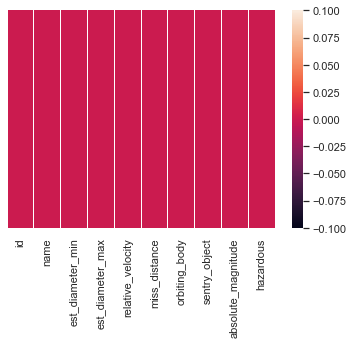

In [21]:
# Plot a heat map showing the null values
sns.heatmap(df.isnull(), yticklabels=False)
plt.savefig('/Volumes/Music/Data Analysis/My Projects/NASA - Nearest Earth Objects/NASA-NearEarthObjects/heatmap.png')

In [22]:
# Remove null values
df = df.dropna()
df

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
0,2162635,162635 (2000 SS164),1.198271,2.679415,13569.249224,5.483974e+07,Earth,False,16.73,False
1,2277475,277475 (2005 WK4),0.265800,0.594347,73588.726663,6.143813e+07,Earth,False,20.00,True
2,2512244,512244 (2015 YE18),0.722030,1.614507,114258.692129,4.979872e+07,Earth,False,17.83,False
3,3596030,(2012 BV13),0.096506,0.215794,24764.303138,2.543497e+07,Earth,False,22.20,False
4,3667127,(2014 GE35),0.255009,0.570217,42737.733765,4.627557e+07,Earth,False,20.09,True
...,...,...,...,...,...,...,...,...,...,...
90831,3763337,(2016 VX1),0.026580,0.059435,52078.886692,1.230039e+07,Earth,False,25.00,False
90832,3837603,(2019 AD3),0.016771,0.037501,46114.605073,5.432121e+07,Earth,False,26.00,False
90833,54017201,(2020 JP3),0.031956,0.071456,7566.807732,2.840077e+07,Earth,False,24.60,False
90834,54115824,(2021 CN5),0.007321,0.016370,69199.154484,6.869206e+07,Earth,False,27.80,False


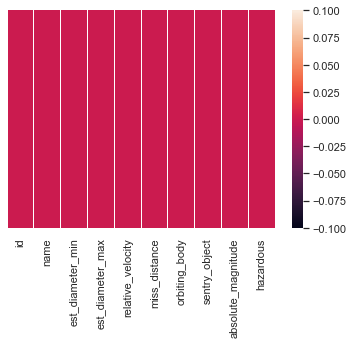

In [23]:
# Plot a heat map verifying the null values are removed
sns.heatmap(df.isnull(), yticklabels=False)

In [24]:
# Group the DataFrame by Last Name to see any duplicates
df_engine = df.groupby('id').count()
df_engine

,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
id,,,,,,,,,
2000433,3,3,3,3,3,3,3,3,3
2000719,1,1,1,1,1,1,1,1,1
2001036,1,1,1,1,1,1,1,1,1
2001566,5,5,5,5,5,5,5,5,5
2001580,2,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...
54275849,1,1,1,1,1,1,1,1,1
54275852,1,1,1,1,1,1,1,1,1
54275853,1,1,1,1,1,1,1,1,1


In [25]:
# Get some statistics (can also include, 'min', 'max', 'mean')
df.groupby('id').miss_distance.agg(['mean'])

,mean
id,
2000433,3.754117e+07
2000719,4.258288e+07
2001036,5.372124e+07
2001566,4.609560e+07
2001580,4.413007e+07
...,...
54275849,2.211065e+07
54275852,1.781882e+07
54275853,9.777491e+06


In [26]:
# Drop any unnecessary columns ('number')
df_ridge = df.drop(columns=['orbiting_body','sentry_object','hazardous', 'est_diameter_min','est_diameter_max'], axis=1)
df_ridge.head(50)

# df = df.drop('column_name', axis=1)
# where 1 is the axis number (0 for rows and 1 for columns.)

# Or, the drop() method accepts index/columns keywords as an alternative to specifying the axis. 
#So we can now just do:

# df = df.drop(columns=['column_nameA', 'column_nameB'])

,id,name,relative_velocity,miss_distance,absolute_magnitude
0,2162635,162635 (2000 SS164),13569.249224,5.483974e+07,16.73
1,2277475,277475 (2005 WK4),73588.726663,6.143813e+07,20.00
2,2512244,512244 (2015 YE18),114258.692129,4.979872e+07,17.83
3,3596030,(2012 BV13),24764.303138,2.543497e+07,22.20
4,3667127,(2014 GE35),42737.733765,4.627557e+07,20.09
5,54138696,(2021 GY23),34297.587778,4.058569e+07,24.32
6,54189957,(2021 PY40),27529.472307,2.906912e+07,20.95
7,54230078,(2021 XD6),57544.470083,5.511502e+07,28.49
8,2088213,88213 (2001 AF2),56625.210122,6.903598e+07,19.40
9,3766065,(2016 YM),48425.840329,3.835526e+07,22.00


In [27]:
# Create bins for each category of magnitude
# Create the bins in which Data will be held
bins = [1, 7, 13, 16, 19, 22, 25, 28, 31, 34]

# Create the names for the five bins
group_names = ["1 > x < 7", "7 > x < 13 ", "13 > x < 16", "16 > x < 19", "19 > x < 22", "22 > x < 25", "25 > x < 28", "28 > x < 31", "31 > x < 34"]

In [28]:
# Use bins to create a new column for the magnitude
df_ridge["Size"] = pd.cut(df_ridge["absolute_magnitude"], bins, labels=group_names, include_lowest=True)
df_ridge

,id,name,relative_velocity,miss_distance,absolute_magnitude,Size
0,2162635,162635 (2000 SS164),13569.249224,5.483974e+07,16.73,16 > x < 19
1,2277475,277475 (2005 WK4),73588.726663,6.143813e+07,20.00,19 > x < 22
2,2512244,512244 (2015 YE18),114258.692129,4.979872e+07,17.83,16 > x < 19
3,3596030,(2012 BV13),24764.303138,2.543497e+07,22.20,22 > x < 25
4,3667127,(2014 GE35),42737.733765,4.627557e+07,20.09,19 > x < 22
...,...,...,...,...,...,...
90831,3763337,(2016 VX1),52078.886692,1.230039e+07,25.00,22 > x < 25
90832,3837603,(2019 AD3),46114.605073,5.432121e+07,26.00,25 > x < 28
90833,54017201,(2020 JP3),7566.807732,2.840077e+07,24.60,22 > x < 25
90834,54115824,(2021 CN5),69199.154484,6.869206e+07,27.80,25 > x < 28


In [29]:
#Series
# we generate a pd.Series with the size for object's absolute magnitude 
# (used later for colors in the FacetGrid plot), and we create a new column in temp dataframe
size_mean_series = df_ridge.groupby('Size')['absolute_magnitude'].mean()
df_ridge['mean_magnitude'] = df_ridge['Size'].map(size_mean_series)
df_ridge


,id,name,relative_velocity,miss_distance,absolute_magnitude,Size,mean_magnitude
0,2162635,162635 (2000 SS164),13569.249224,5.483974e+07,16.73,16 > x < 19,18.066835
1,2277475,277475 (2005 WK4),73588.726663,6.143813e+07,20.00,19 > x < 22,20.698142
2,2512244,512244 (2015 YE18),114258.692129,4.979872e+07,17.83,16 > x < 19,18.066835
3,3596030,(2012 BV13),24764.303138,2.543497e+07,22.20,22 > x < 25,23.609692
4,3667127,(2014 GE35),42737.733765,4.627557e+07,20.09,19 > x < 22,20.698142
...,...,...,...,...,...,...,...
90831,3763337,(2016 VX1),52078.886692,1.230039e+07,25.00,22 > x < 25,23.609692
90832,3837603,(2019 AD3),46114.605073,5.432121e+07,26.00,25 > x < 28,26.306475
90833,54017201,(2020 JP3),7566.807732,2.840077e+07,24.60,22 > x < 25,23.609692
90834,54115824,(2021 CN5),69199.154484,6.869206e+07,27.80,25 > x < 28,26.306475


In [41]:
length = len(group_names)


# Finding the nuber of subplots in 'FacetGrid'
num_subplots = len(g.axes.flat)
print(f"Number of subplots in FacetGrid: {num_subplots}", "Length of group_names", length)

Number of subplots in FacetGrid: 9 Length of group_names 9


IndexError: list index out of range

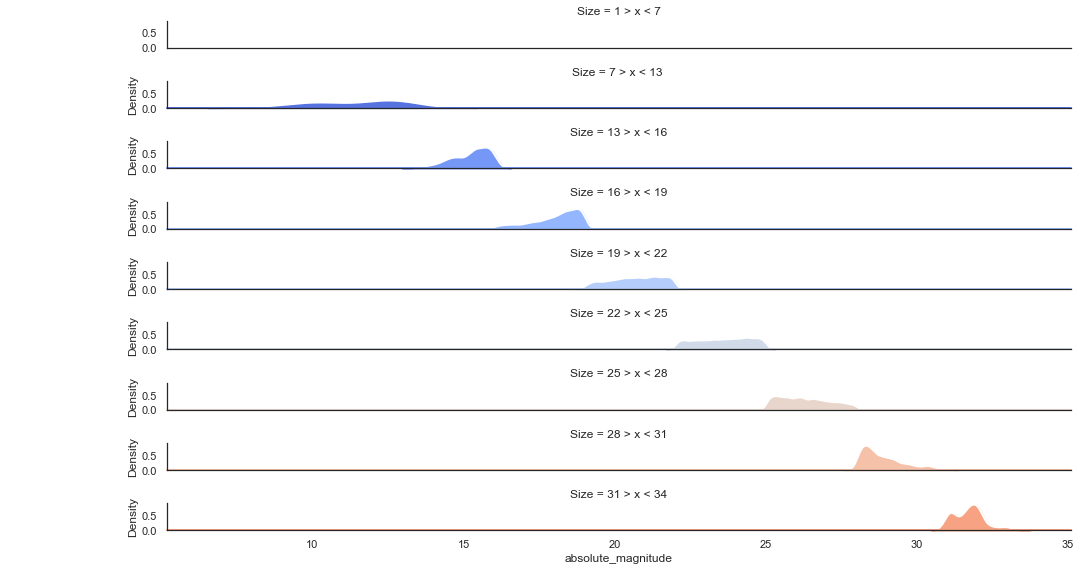

In [43]:
# Create a ridge chart
group_names = ['Group 1', 'Group 2', 'Group 3', 'Group 4', 'Group 5', 'Group 6', 'Group 7', 'Group 8', 'Group 9']


# we generate a color palette with Seaborn.color_palette()
pal = sns.color_palette(palette='coolwarm', n_colors=10)

# in the sns.FacetGrid class, the 'hue' argument is the one that is the one that will be represented by colors with 'palette'
g = sns.FacetGrid(df_ridge, row='Size', hue='mean_magnitude', aspect=15, height=0.9, palette=pal)

# then we add the densities kdeplots for each element
g.map(sns.kdeplot, 'absolute_magnitude',
      bw_adjust=1, clip_on=False,
      fill=True, alpha=1, linewidth=1.5)

# here we add a white line that represents the contour of each kdeplot
g.map(sns.kdeplot, 'absolute_magnitude', 
      bw_adjust=1, clip_on=False, 
      color="w", lw=2)

# here we add a horizontal line for each plot
g.map(plt.axhline, y=0,
      lw=2, clip_on=False)


# we loop over the FacetGrid figure axes (g.axes.flat) and add the month as text with the right color
# notice how ax.lines[-1].get_color() enables you to access the last line's color in each matplotlib.Axes
for i, ax in enumerate(g.axes.flat):
    lines = ax.lines  # Get the lines in the subplot
    if lines:  # Check if there are lines
        color = lines[0].get_color()  # Get the color from the first line
        ax.text(-0.1, 0.02, group_names[i+1],
                fontweight='bold', fontsize=12,
                color=color)

    
# we use matplotlib.Figure.subplots_adjust() function to get the subplots to overlap
g.fig.subplots_adjust(hspace=-0.3)

# remove axes titles, yticks and spines
g.set_titles("")
# g.set(yticks=[])
g.despine(bottom=True, left=True)

plt.setp(ax.get_xticklabels(), fontsize=55, fontweight='bold')
plt.xlabel('Absolute Magnitude', fontsize=12)
g.fig.suptitle('Absolute Magnitude Distribution within NEA Size Categories',
               ha='center',
               fontsize=15,
               fontweight=15)
plt.savefig('/Volumes/Music/Data Analysis/My Projects/NASA - Nearest Earth Objects/NASA-NearEarthObjects/AbMagRidge.png')
plt.show()

The r-squared is: 0.12521875685386286
The correlation coefficient confirms a very weak negative correlation
between the relative velocity of a near earth object and its absolute magnitude


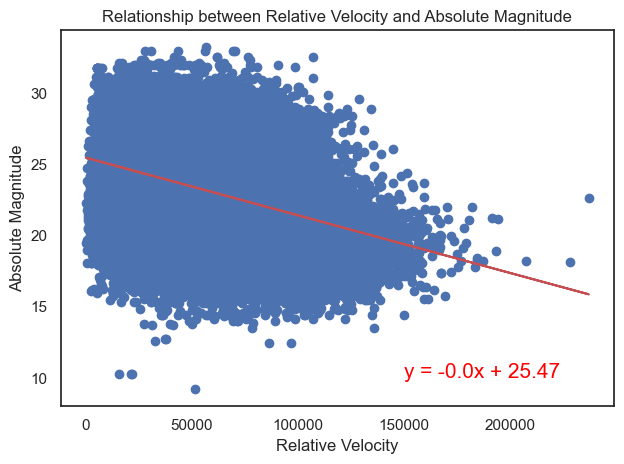

In [ ]:
# Add the linear regression equation and line to plot
x_values = df_ridge['relative_velocity']
y_values = df_ridge['absolute_magnitude']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(150000,10),fontsize=15,color="red")
plt.title("Relationship between Relative Velocity and Absolute Magnitude")
plt.xlabel("Relative Velocity")
plt.ylabel("Absolute Magnitude")
print(f"The r-squared is: {rvalue**2}")
print(f"The correlation coefficient confirms a very weak negative correlation"
"\nbetween the relative velocity of a near earth object and its absolute magnitude")
plt.tight_layout()
plt.savefig('/Users/mdcummings/Desktop/Data Analysis/My Projects/NASA - Nearest Earth Objects/NASA-NearEarthObjects/RVAMlinregress.png')

plt.show()

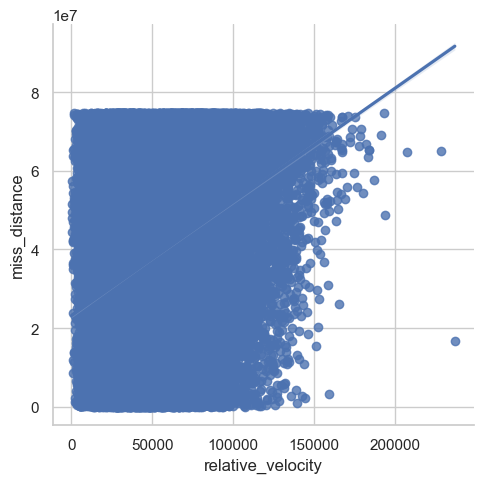

In [ ]:
# Statistical Model of the Relative Velocity VS Miss Distance
sns.set(style = "whitegrid")
fig = sns.lmplot(x="relative_velocity", y="miss_distance", data=df_ridge)

In [44]:
# Import the PCA module
from sklearn.decomposition import PCA

In [45]:
# Instantiate the PCA instance and declare the number of PCA variables
pca=PCA(n_components=2)

In [46]:
# Drop the name column
df_ridge = df_ridge.drop(columns=['name', 'Size'])

In [49]:
# Fit the PCA model on the transformed credit card DataFrame
nea_pca = pca.fit_transform(df_ridge)

# Review the first 5 rows of the array of list data
nea_pca[:5]

array([[-20856933.99329586,  -5496241.46276542],
       [-27028466.67297078,  -3158655.51097483],
       [-15994299.71958213,  -6870471.50357855],
       [  7302781.6713422 , -14082582.46298075],
       [-12288104.52808472,  -6973938.47829217]])

In [50]:
# Calculate the PCA explained variance ratio
pca.explained_variance_ratio_

array([0.54432012, 0.45567927])

In [51]:
# Create the PCA DataFrame
nea_pca_df = pd.DataFrame(
    nea_pca,
    columns=["PCA1", "PCA2"]
)

# Review the PCA DataFrame
nea_pca_df.head()

,PCA1,PCA2
0,-2.085693e+07,-5.496241e+06
1,-2.702847e+07,-3.158656e+06
2,-1.599430e+07,-6.870472e+06
3,7.302782e+06,-1.408258e+07
4,-1.228810e+07,-6.973938e+06


In [52]:
# Create a a list to store inertia values and the values of k
inertia = []
k = list(range(1, 11))

In [53]:
# Create a for-loop where each value of k is evaluated using the K-means algorithm
# Fit the model using the NEA PCA DataFrame
# Append the value of the computed inertia from the `inertia_` attribute of the KMeans model instance
for i in k:
    k_model = KMeans(n_clusters=i, random_state=0)
    k_model.fit(nea_pca_df)
    inertia.append(k_model.inertia_)

NameError: name 'KMeans' is not defined

In [ ]:
 # Define a DataFrame to hold the values for k and the corresponding inertia
elbow_data = {"k": k, "inertia": inertia}

# Create the DataFrame from the elbow data
df_elbow = pd.DataFrame(elbow_data)

# Review the DataFrame
df_elbow.head()

,k,inertia
0,1,8.495388e+19
1,2,4.527228e+19
2,3,1.914076e+19
3,4,1.112748e+19
4,5,6.160360e+18


In [ ]:
# Plot the DataFrame
df_elbow.hvplot.line(
    x="k", 
    y="inertia", 
    title="Elbow Curve", 
    xticks=k
)

:Curve   [k]   (inertia)

In [ ]:
# Define the model Kmeans model using the optimal value of k for the number of clusters.
model = KMeans(n_clusters=5, random_state=0)

# Fit the model
model.fit(nea_pca_df)

# Make predictions
k_5 = model.predict(nea_pca_df)

# Create a copy of the customers_pca_df DataFrame
nea_pca_predictions_df = nea_pca_df.copy()

# Add a class column with the labels
nea_pca_predictions_df["class"] = k_5

In [ ]:
# Plot the clusters
nea_pca_predictions_df.hvplot.scatter(
    x="PCA1",
    y="PCA2",
    by="class"
)

:NdOverlay   [class]
   :Scatter   [PCA1]   (PCA2)